<a href="https://colab.research.google.com/github/2286-SANA/Image_Classification_using_CNN/blob/main/final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

**DATASET**

In [2]:
!wget https://www.dropbox.com/s/alw4wehyx8gxb1j/dogs-vs-cats.zip?dl=0
!unzip /content/dogs-vs-cats.zip?dl=0

!unzip /content/train.zip
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
TRAIN_DIR = "./DATASET"

ORG_DIR = "/content/train"

CLASS = ['cat','dog']

In [49]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR,C)

  #if directory is not present then creat one
  if not os.path.exists( DEST ):
    os.makedirs(DEST)

  for img_path in glob.glob(os.path.join(ORG_DIR , C)+"*"):
      SRC =img_path

      shutil.copy(SRC , DEST)

In [6]:
os.listdir("/content/train")

['dog.7239.jpg',
 'dog.6691.jpg',
 'dog.3296.jpg',
 'dog.4366.jpg',
 'dog.2630.jpg',
 'dog.6430.jpg',
 'dog.4329.jpg',
 'dog.2560.jpg',
 'cat.12220.jpg',
 'dog.8842.jpg',
 'dog.8864.jpg',
 'dog.1984.jpg',
 'cat.2984.jpg',
 'dog.9452.jpg',
 'cat.4707.jpg',
 'cat.10446.jpg',
 'cat.7937.jpg',
 'cat.11637.jpg',
 'cat.1992.jpg',
 'cat.3614.jpg',
 'cat.957.jpg',
 'dog.7627.jpg',
 'dog.8739.jpg',
 'dog.8299.jpg',
 'cat.10505.jpg',
 'cat.8964.jpg',
 'dog.211.jpg',
 'dog.9383.jpg',
 'dog.6998.jpg',
 'dog.420.jpg',
 'dog.9613.jpg',
 'cat.3236.jpg',
 'dog.7350.jpg',
 'dog.6521.jpg',
 'cat.9970.jpg',
 'dog.11248.jpg',
 'cat.1519.jpg',
 'cat.8802.jpg',
 'dog.7893.jpg',
 'dog.3826.jpg',
 'cat.3899.jpg',
 'dog.4582.jpg',
 'dog.9522.jpg',
 'cat.8290.jpg',
 'dog.6220.jpg',
 'dog.10346.jpg',
 'dog.10249.jpg',
 'dog.214.jpg',
 'dog.10336.jpg',
 'dog.7559.jpg',
 'cat.11275.jpg',
 'dog.1365.jpg',
 'dog.12301.jpg',
 'cat.1372.jpg',
 'dog.11583.jpg',
 'dog.6908.jpg',
 'dog.4020.jpg',
 'cat.8862.jpg',
 'dog.7

MODEL BUILDING

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img , img_to_array
import keras

In [8]:
base_model = InceptionV3(input_shape =(256,256,3), include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [10]:
X = Flatten()(base_model.output)
X = Dense(units=2 , activation= 'sigmoid')(X)

#Final model
model = Model(base_model.input,X)

model.compile(
optimizer= 'adam', 
loss= keras.losses.binary_crossentropy, 
metrics= ['accuracy'])


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Pre-Process data using Data Generator

In [11]:
train_datagen = ImageDataGenerator(featurewise_center= True,
                                   rotation_range= 0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip= True,
                                   preprocessing_function= preprocess_input,
                                   zoom_range=0.4,
                                   shear_range= 0.4)

train_data = train_datagen.flow_from_directory(directory= "/content/DATASET",
                                               target_size=(256,256),
                                               batch_size= 36)
                                   

Found 25000 images belonging to 2 classes.


In [12]:
train_data.class_indices

{'cat': 0, 'dog': 1}

Visualizing the data

In [13]:
t_img , label = train_data.next()

In [14]:
t_img.shape
#.shape

(36, 256, 256, 3)

In [15]:
def plotImages(img_arr , label):
   """
   input : image array
   output: plot image
   """


   for idx , img in enumerate(img_arr):

      if idx <= 10 :

        plt.figure(figsize= (5,5))
        plt.imshow(img)
        plt.title(img.shape)
        plt.axis = False 
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


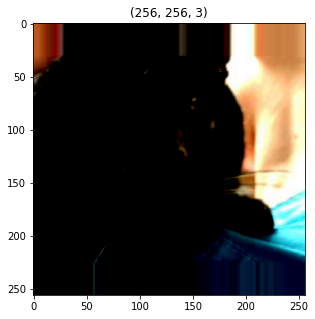

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


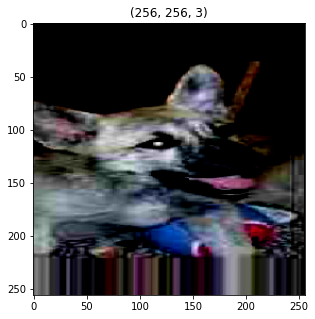

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


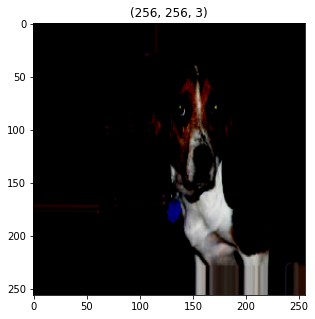

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


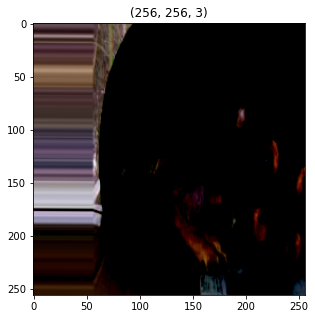

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


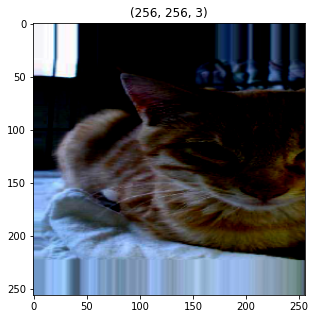

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


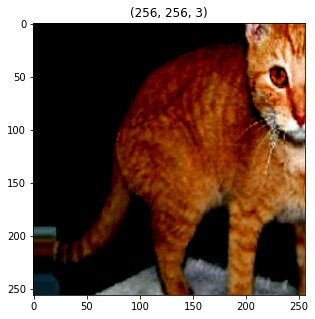

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


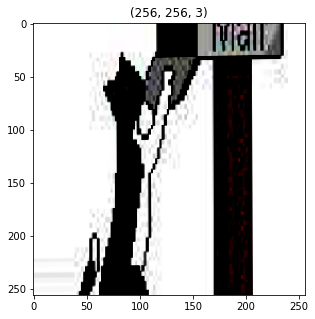

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


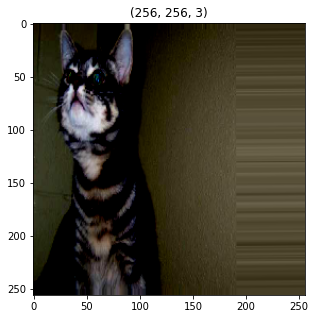

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


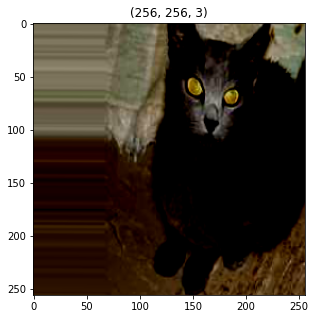

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


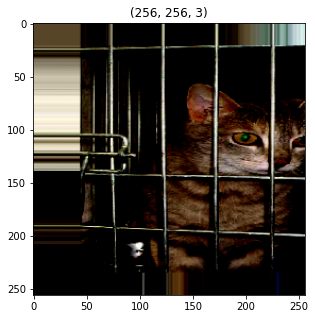

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


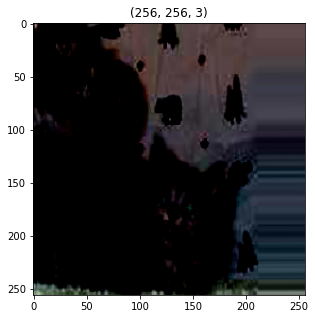

In [16]:
plotImages(t_img , label)

Model Check Point

In [20]:
from keras.callbacks import ModelCheckpoint , EarlyStopping

mc= ModelCheckpoint(filepath= "./best_model.h5",
                    monitor="accuracy",
                    verbose=1,
                    save_best_only= True)

es= EarlyStopping(monitor= "accuracy",
                  min_delta=0.01,
                  patience= 5,
                  verbose= 1)

cb= [mc,es]

In [21]:
his = model.fit_generator(train_data,
                          steps_per_epoch=10,
                          epochs=20,
                          callbacks= cb)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.1872 - accuracy: 0.9694
Epoch 1: accuracy improved from -inf to 0.96944, saving model to ./best_model.h5
10/10 [==============================] - 7s 654ms/step - loss: 0.1872 - accuracy: 0.9694
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.5948 - accuracy: 0.9667
Epoch 2: accuracy did not improve from 0.96944
10/10 [==============================] - 7s 623ms/step - loss: 0.5948 - accuracy: 0.9667
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.3247 - accuracy: 0.9667
Epoch 3: accuracy did not improve from 0.96944
10/10 [==============================] - 7s 725ms/step - loss: 0.3247 - accuracy: 0.9667
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.4155 - accuracy: 0.9722
Epoch 4: accuracy improved from 0.96944 to 0.97222, saving model to ./best_model.h5
10/10 [==============================] - 6s 635ms/step - loss: 0.4155 - accuracy: 0.9722
Epoch 5/2

In [51]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [52]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy'])

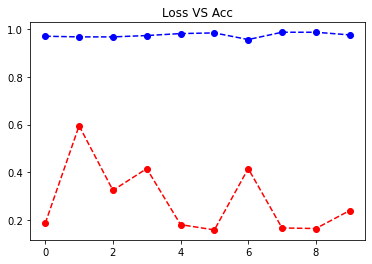

In [24]:
plt.plot(h['loss'],'go--', c="red" , )
plt.plot(h['accuracy'],'go--', c="blue" , )

plt.title("Loss VS Acc")
plt.show()

Validate the Model


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image is of cat


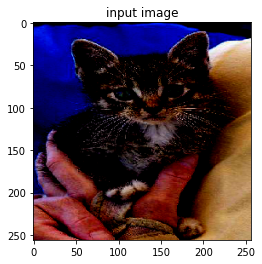

In [53]:
path = "/content/test1/1029.jpg"
img = load_img(path, target_size=(256,256) )

i=img_to_array(img)

i= preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred== 0:
  print("The image is of cat")
else:
  print("The image is of Dog")


plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show() 

GRAD-CAM

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

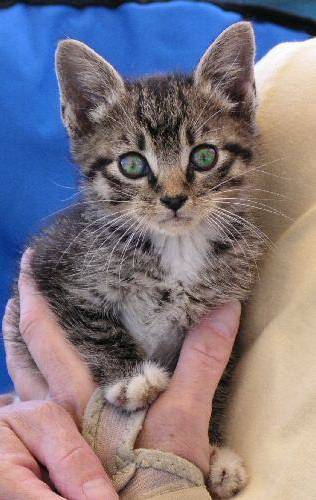

In [55]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = "/content/test1/1029.jpg"

display(Image(img_path))

**Grad Cam Algorithm**

In [56]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [('n02123045', 'tabby', 11.321312)]


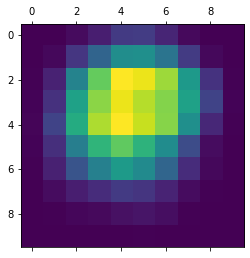

In [58]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

model.layers[-1].activation = None


preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])


heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

**Superimposed Visualization**

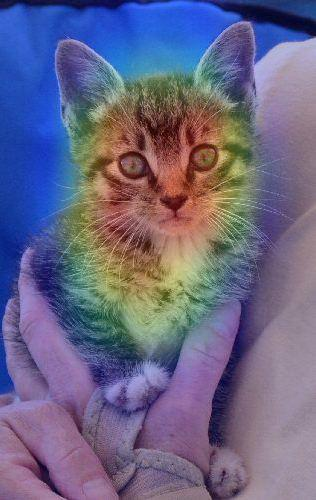

In [59]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

**Example ....**

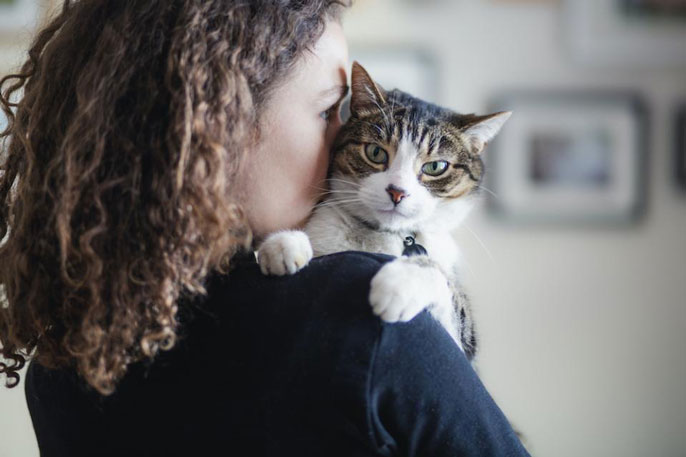

Predicted: [('n02123045', 'tabby', 8.293431), ('n02123159', 'tiger_cat', 6.250709)]


In [45]:
img_path = "/content/cat-and-woman.jpg" 
display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=2)[0])

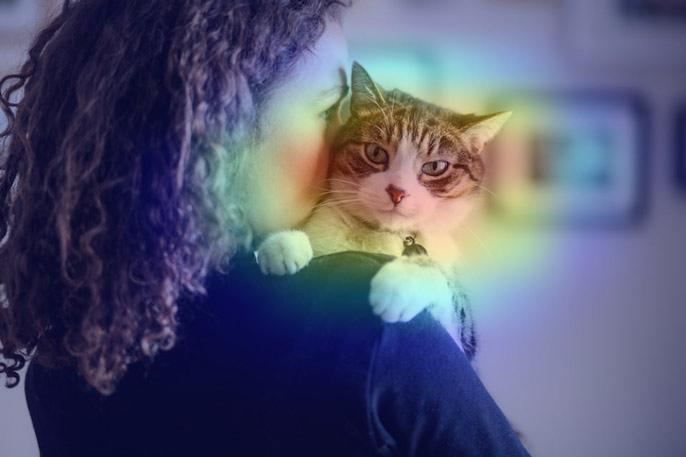

In [48]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=285)

save_and_display_gradcam(img_path, heatmap)

**Example......**

81920/72452 [=================================] - 0s 0us/step


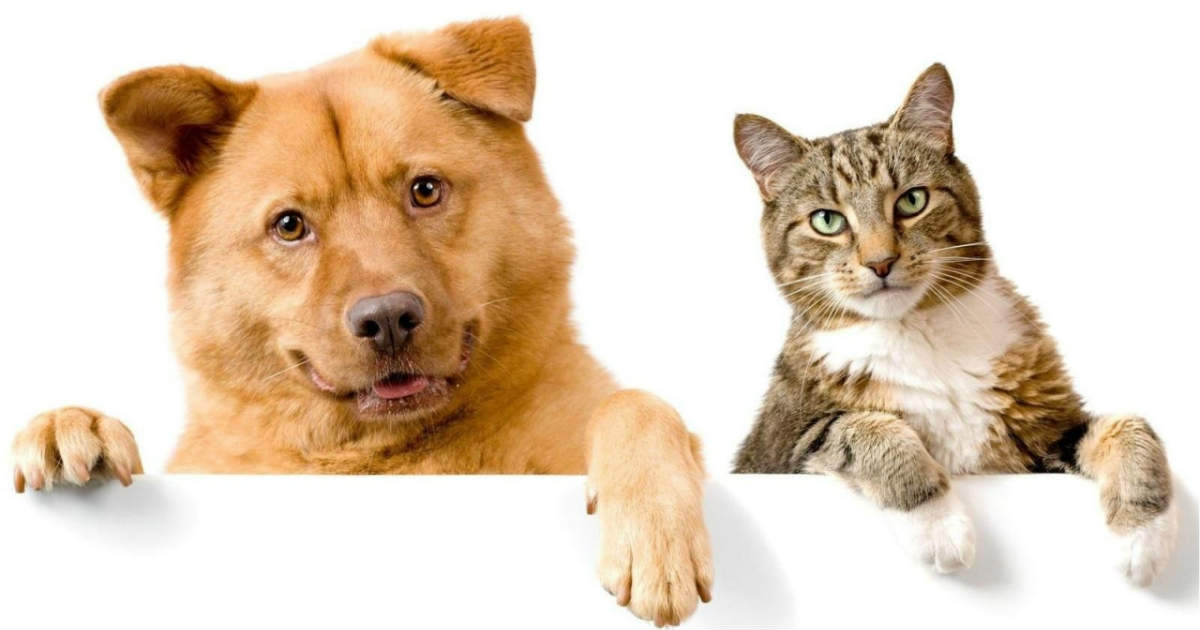

Predicted: [('n02112137', 'chow', 4.6112413), ('n02124075', 'Egyptian_cat', 4.3817387)]


In [39]:
img_path = keras.utils.get_file(
    "cat.jpg",
    "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg",
)

display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=2)[0])

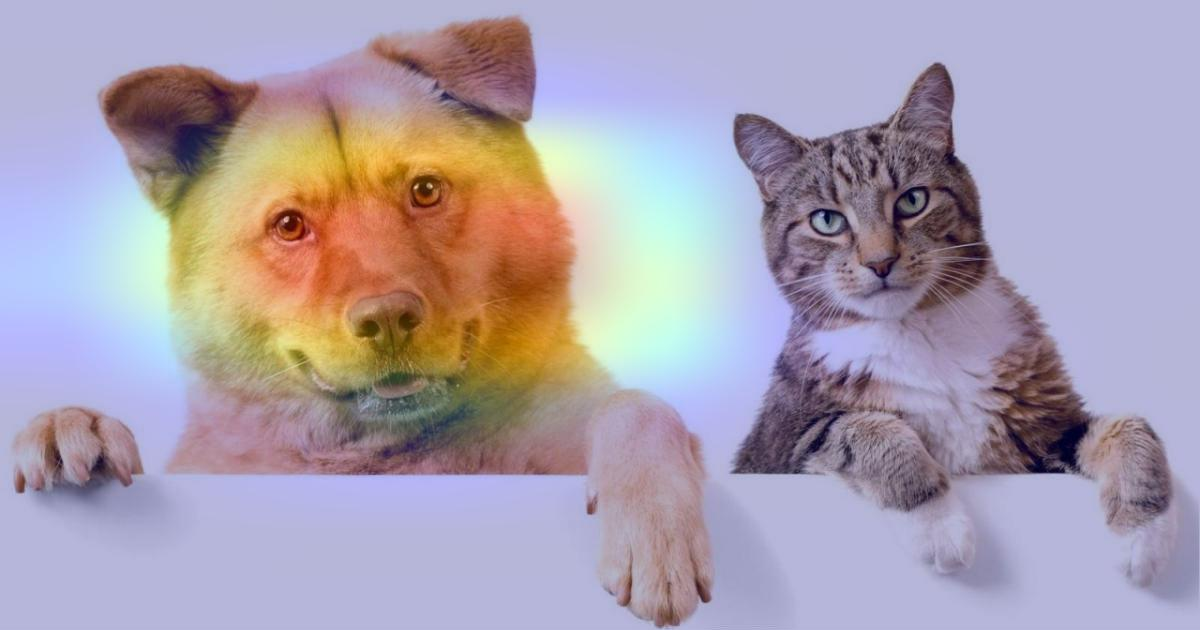

In [34]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=260)

save_and_display_gradcam(img_path, heatmap)

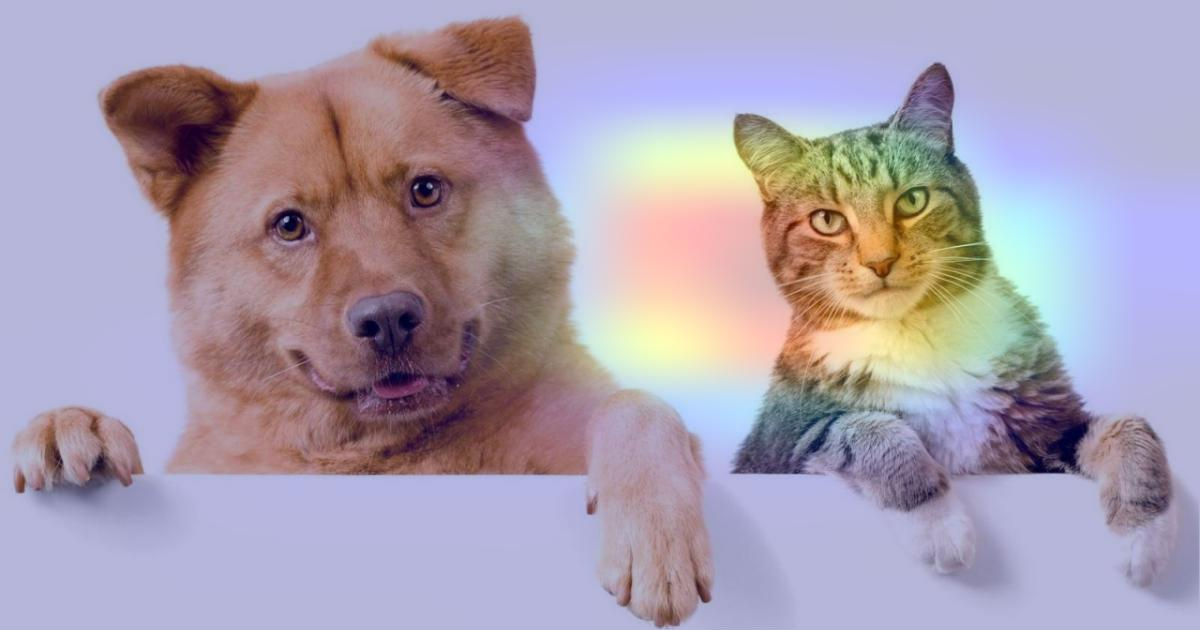

In [38]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=285)

save_and_display_gradcam(img_path, heatmap)